In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pickle 
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
all_df_y = pickle.load(open("./dump_file/all_df_y","rb"))
all_df_y['2cArousal'] = 0
all_df_y['2cArousal'][all_df_y['valence'] >= 5] = 1
all_df_y['2cValence'] = 0
all_df_y['2cValence'][all_df_y['valence'] >= 5] = 1
print(all_df_y.head(5))

#读取32个通道的EEG数据，每个通道包含32×40=1280个信号样本（人次×每人次40实验）
#每个样本向量大小为8064点（63s*128Hz）
for eegCH in range(1,33,1):
    file_path = "./dump_file/CH{}_df_EEG_x".format(eegCH)
    locals()['CH{}_df_EEG_x'.format(eegCH)] = pickle.load(open(file_path,"rb"))
    file_path = "./dump_file/CH{}eegfft_df".format(eegCH)
    locals()["CH{}eegfft_df".format(eegCH)] = pickle.load(open(file_path,"rb"))

       valence  arousal  dominance  liking  2cArousal  2cValence
s01_0     7.71     7.60       6.90    7.83          1          1
s01_1     8.10     7.31       7.28    8.47          1          1
s01_2     8.58     7.54       9.00    7.08          1          1
s01_3     4.94     6.01       6.12    8.06          0          0
s01_4     6.96     3.92       7.19    6.05          1          1


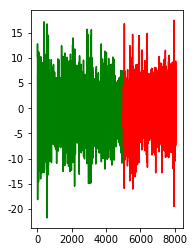

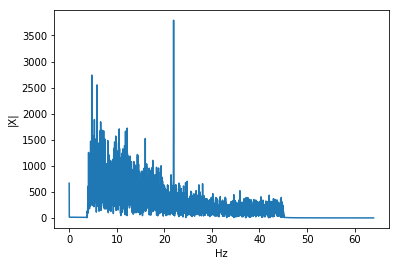

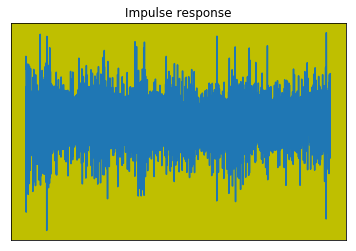

In [12]:
xVector = CH1_df_EEG_x.iloc[0,:]
plt.subplot(1,2,1)
plt.plot(xVector[0:5000],color='g')
plt.plot(xVector[5000:8064],color='r')
plt.show()

#plt.subplot(1,2,2)
xVector = CH1eegfft_df.iloc[0,0:int(8064/2)]
xLabelVector = [(n-1)*128/8064 for n in range(1,int(8064/2)+1,1)]
xVector = abs(xVector) #画幅度谱
plt.plot(xLabelVector,xVector)
plt.xlabel('Hz')
plt.ylabel('|X|')
plt.show()
#另外一个内嵌图
a = plt.axes(facecolor='y')
xVector = CH1_df_EEG_x.iloc[0,:]
plt.plot(xVector)
plt.title('Impulse response')
#plt.xlim(0, 0.2)
plt.xticks([])
plt.yticks([])
plt.show()